In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [28]:
df = pd.read_excel("System_combined.xlsx")
df

,Unnamed: 0,DateTime,systemPrice
0,0,2018-01-01 00:00:00,26.263485
1,1,2018-01-01 01:00:00,26.382834
2,2,2018-01-01 02:00:00,26.043561
3,3,2018-01-01 03:00:00,24.585894
4,4,2018-01-01 04:00:00,24.626124
...,...,...,...
52579,8755,2023-12-31 19:00:00,49.594203
52580,8756,2023-12-31 20:00:00,44.985186
52581,8757,2023-12-31 21:00:00,44.755875
52582,8758,2023-12-31 22:00:00,43.986141


In [29]:
df.set_index("DateTime", inplace=True)
df.sort_index(ascending=True)
df = df.drop("Unnamed: 0", axis = 1)
df

,systemPrice
DateTime,
2018-01-01 00:00:00,26.263485
2018-01-01 01:00:00,26.382834
2018-01-01 02:00:00,26.043561
2018-01-01 03:00:00,24.585894
2018-01-01 04:00:00,24.626124
...,...
2023-12-31 19:00:00,49.594203
2023-12-31 20:00:00,44.985186
2023-12-31 21:00:00,44.755875


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2018-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   systemPrice  52578 non-null  float64
dtypes: float64(1)
memory usage: 821.6 KB


In [31]:
df.isna().sum()

systemPrice    6
dtype: int64

In [32]:
# Using time series interpolation to fill in the 6 missing values 
df['systemPrice'].interpolate(method='time', inplace=True)


In [33]:
df.isna().sum()

systemPrice    0
dtype: int64

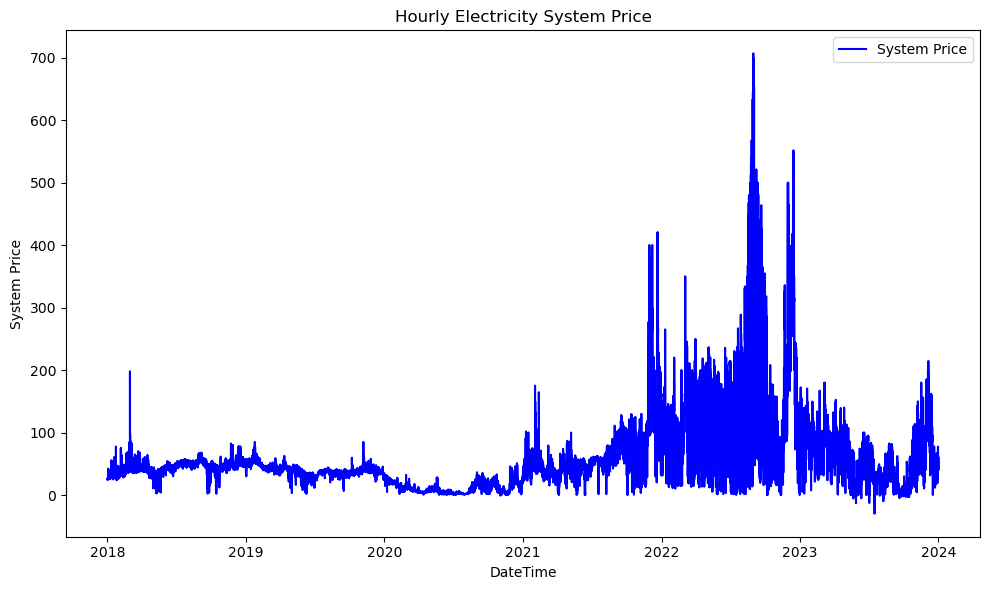

In [34]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df.index, df['systemPrice'], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


### Check for stationarity 

In [35]:
result = adfuller(df['systemPrice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -9.577550
p-value: 0.000000


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


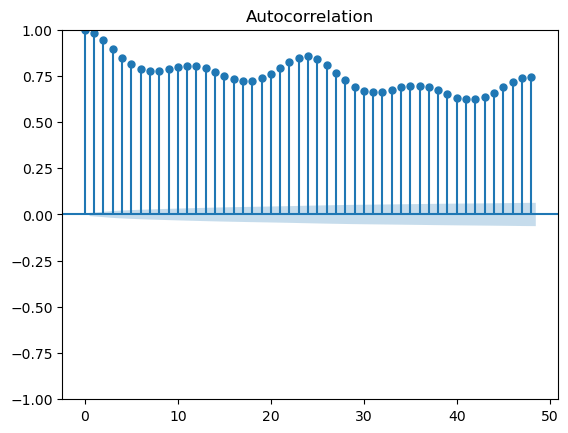

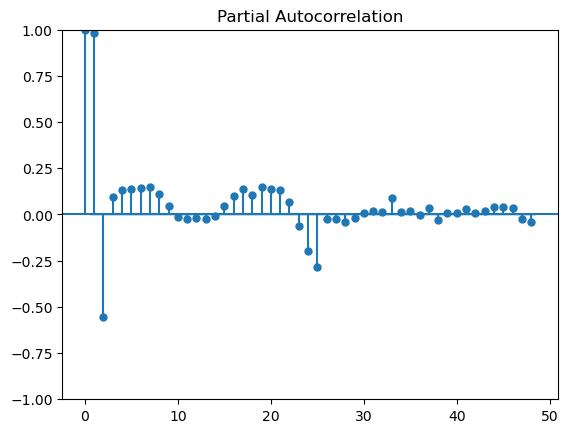

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced and seasonally differenced data
plot_acf(df)
plot_pacf(df)
plt.show()


In [38]:
deseasonalized = df['systemPrice'].diff(24).dropna()
detrended_deseasonalized = deseasonalized.diff().dropna()


In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['systemPrice'], model='additive', period=24)
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

detrended_deseasonalized = df['residual'].dropna()


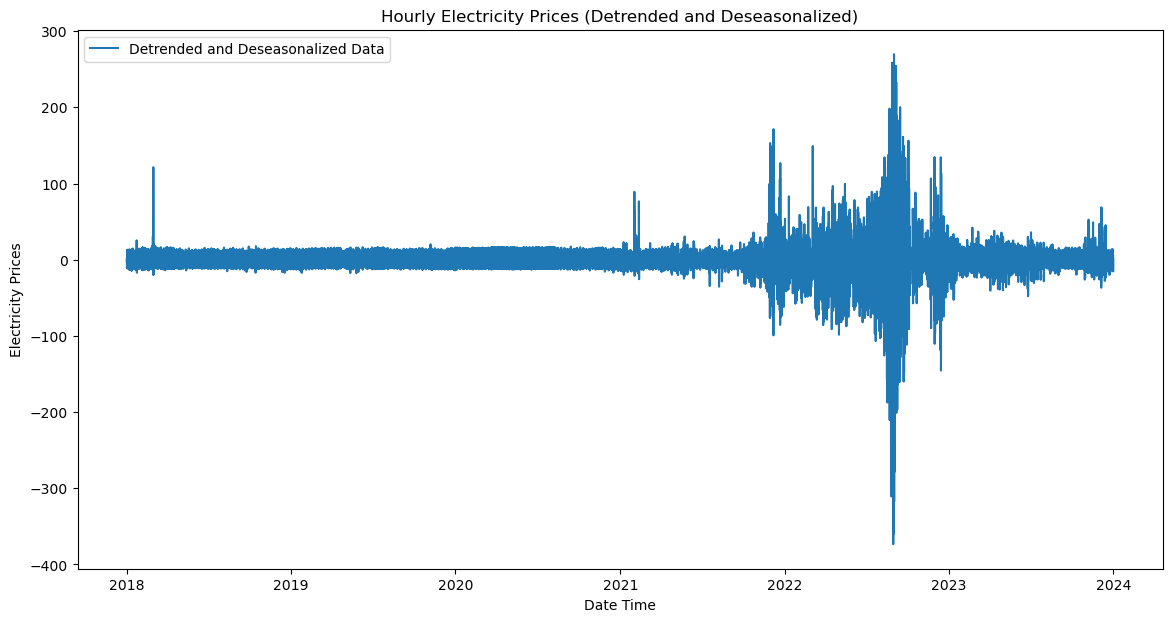

In [40]:
import matplotlib.pyplot as plt

# Plotting the differenced data
plt.figure(figsize=(14, 7))
plt.plot(detrended_deseasonalized, label='Detrended and Deseasonalized Data')
plt.title('Hourly Electricity Prices (Detrended and Deseasonalized)')
plt.xlabel('Date Time')
plt.ylabel('Electricity Prices')
plt.legend()
plt.show()


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


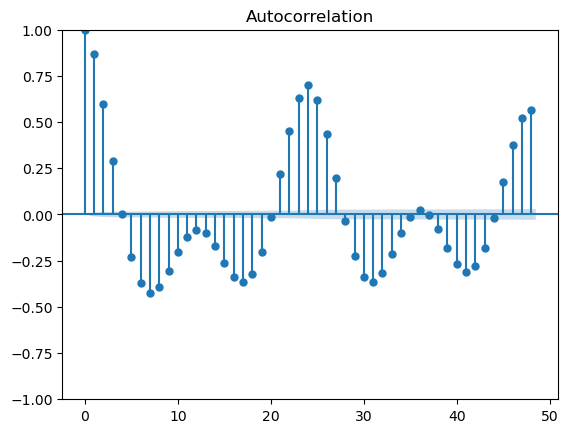

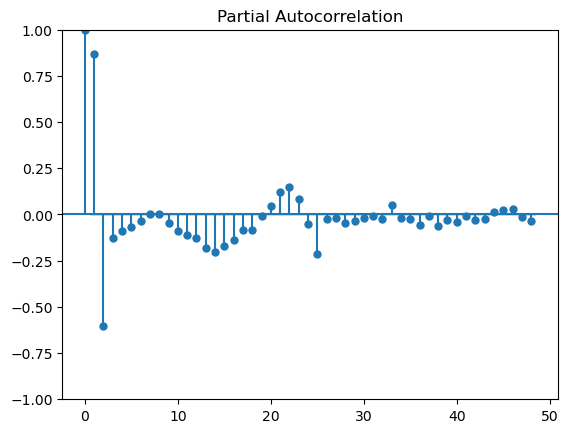

In [41]:
plot_acf(detrended_deseasonalized)
plot_pacf(detrended_deseasonalized)
plt.show()

### ARIMA